# Electricity and Magnetism - Numeric Exercise 2023
*Authors - Kai Carmin , Aviad Leibovich *
<br>Throught the exercise we will use a class called Electron that represents an electron in 3D space with position and velocity. The class will contain methods for calculating all the equaitions in different systems described in this exercise.
<br>We will also use the constants:
$$ m_e=9.109\cdot10^{-31}kg \quad ; \quad q_e=−1.602\cdot 10^{-19}C$$

In [5]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
# import scienceplots
from scipy.spatial import distance


plt.style.use(['science', 'notebook', 'grid'])
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('axes', labelsize=9)


# Constants
m_e = (9.109)*(10**(-31))
q_e = (-1.601)*(10**(-19))
k_e = (8.988)*((10)**(9))
X, Y, Z = 0, 1, 2
q_r, q_theta, q_phi = 0, 1, 2

class Electron:
    def __init__(self, pos, v_0, pos_spherical = [0, 0, 0]):
      self.pos = pos
      self.pos_spherical = pos_spherical
      self.vel = np.array([0, 0, 0])
      self.v_0 = v_0
      self.path_x = [0]
      self.path_y = [0]
      self.path_z = [0]

    def update_velocity2D(self):
      direction = np.random.uniform(0, 2 * np.pi)
      self.vel = np.array([(self.v_0 * np.cos(direction)), 
                           (self.v_0 * np.sin(direction))], dtype='f')

    def update_path(self):
      self.path_x.append(self.pos[X])
      self.path_y.append(self.pos[Y])

    def movement_in_2d_constant_E0(self, time_step, E_0):
      self.update_velocity2D()
      self.pos = self.pos + (time_step*self.vel) + ((q_e*E_0*(time_step**2))/(2*m_e))
      self.update_path()

    def movement_in_sphere_3d(self, time_step, all_electrons, R, index):
      E = 0
      for i in range(len(all_electrons)):
        if (i != index):
          dist = np.linalg.norm(self.pos - all_electrons[i])
          E += (self.pos - all_electrons[i])/((dist)**(3))
      E *= (k_e*q_e)
      new_pos = self.pos + (time_step*self.vel) + ((q_e * E * (time_step**2)) / (2*m_e))
      if np.linalg.norm(new_pos) < R:
        self.pos  = new_pos
      else:
        self.pos  = new_pos / np.linalg.norm(new_pos)

    def movement_in_cube_3d(self, time_step, all_curr_pos, R, index):
      E = 0
      for i in range(n):
        if (i != index):
          dist = np.linalg.norm(self.pos - all_curr_pos[i])
          E += (self.pos - all_curr_pos[i])/((dist)**(3))
      E *= (k_e*q_e)
      new_pos = self.pos + ((q_e * E * (time_step**2)) / (2*m_e))
      if(new_pos[X] >= R):
        new_pos[X] = R
      if(new_pos[Y] >= R):
        new_pos[Y] = R
      if(new_pos[X] <= -R):
        new_pos[X] = -R
      if(new_pos[Y] <= -R):
        new_pos[Y] = -R
      self.pos = new_pos

## Part 1
In this part, we assume an infinite flat conductor in 2 dimensions. We will calculate numerically the end point of a free electron travelling inside the sheet, in the presence of an external electric field $ \vec{E}(\vec{r})=E_0\hat{x} $.<br> Between collisions the elctron travells for $ 1\tau $ , we assume only the electric field $ \vec{E} $ influence on the path and the electron is not influenced by other electrons or ions.

### 1.

Assume in time t the electron is at $(x,y)$ with velocity $ (v_x,v_y) $ . find the position of the electron after $ 1\tau $.
<br> From Newton's second law we can calculate:

$$ m_e\begin{pmatrix}\ddot{x}\\\ddot{y}\end{pmatrix} = \vec{F}=q_e\cdot \vec{E} = q_e\cdot \begin{pmatrix}E_0\\0\end{pmatrix} $$
$$ \begin{pmatrix}x(t)\\y(t)\end{pmatrix} = \begin{pmatrix}x_0+v_{0,x}t+\frac{q_e\cdot E_0}{2m_e}t^2\\y_0+v_{o,y}\end{pmatrix}$$
so the position after $1\tau$ of the electron will be:
$$ \begin{pmatrix}x(t+\tau)\\y(t+\tau)\end{pmatrix} = \begin{pmatrix}x_0+v_{0,x}(t+\tau)+\frac{q_e\cdot E_0}{2m_e}(t+\tau)^2\\y_0+v_{o,y}t\end{pmatrix}$$

<br>

2.The numerical simulation is the following:





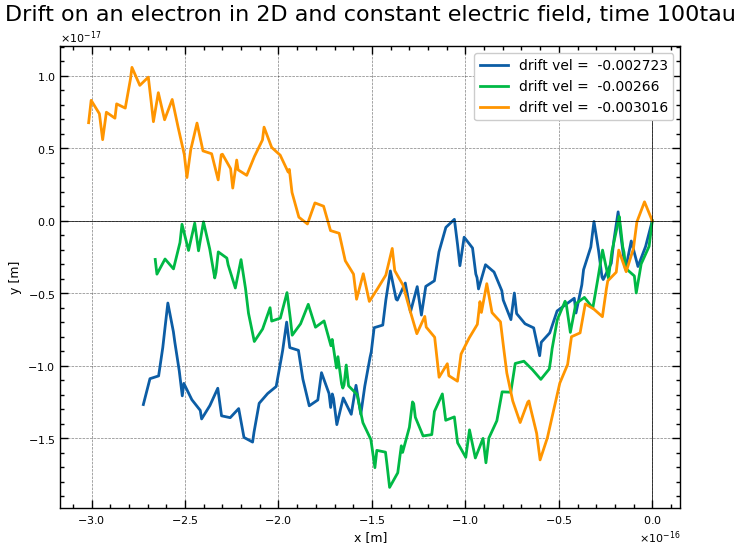

In [ ]:
# Constatnts
v_0 = 0.002
E_0 = np.array([30, 0])
tau = 10**(-15)
pos_0 = np.array([0,0], dtype='f')
e = [Electron(pos_0, v_0), Electron(pos_0, v_0), Electron(pos_0, v_0)]

# calculate the position after 100 timesteps of 1 tau
# using the method movement_in_2d_constant_E0_x
# we will do this for 3 electrons starting at (0,0) and plot it
for i in range(3):
  for j in range(100):
    e[i].movement_in_2d_constant_E0(tau, E_0)
  drift = e[i].path_x[-1]/(100*tau)
  plt.plot(e[i].path_x, e[i].path_y, label = f"drift vel =  {drift:.4}")

plt.ticklabel_format(style='sci', axis='both', scilimits=(0, 0), 
                     useMathText=True)
plt.legend(loc='upper right', fontsize = 'medium')
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("Drift on an electron in 2D and constant electric field, time 100tau")
plt.axhline(color='black', lw=0.5)
plt.axvline(color='black', lw=0.5)
plt.show()

### 3.
Calculating the drift velocity in the $\hat x$ direction with $\frac{x(100\tau)}{100\tau}$ as velocity, we see that for all the simulation repetitions the electrons have the same drift velocity, close to the magnitude of the random velocity $v_0$ (see legend in figure). Let's solve it analytically for $x_0=0$:

$$ \frac{x(100\tau)}{100\tau} = \frac{v_{0,x}100\tau}{100\tau}\cdot \cos{\theta}+\frac{q_e\cdot E_0}{2m_e}\frac{(100\tau)^2}{100\tau}= v_{0,x}+\frac{q_e\cdot E_0}{2m_e}100\tau $$

while $v_{0,x}$ is a random number for every collision, it has a maximum magnitude of 0.002 in the positive direction, while the other term is constant and its magnitude is:
$$ \frac{q_eE_0100\tau}{2m_e} =\frac{-3\cdot 10 \cdot 10^{31}\cdot 10^2}{2\cdot 10^{19}\cdot 10^{15}}=\frac{-3}{2}\cdot \frac{10^{34}}{10^{34}}=-\frac{3}{2}$$
That is, for a $v_0<<1$ the system is not sensitive for the initial velocity, but for $v_0 >> 1$ it will be, this is becuase the random magnitude of the initial velocity in the $x$ direction will determine the end position, rather than the magnitude ot the second term.
Notice that we got different result in the numeric simulation, probably due to the fact that we calculate steps with collisions rather than a continoues movement as described by the analytical solution.
### 4.
As stated, for $v_0=200m/s$ the first term of the velocity is much larger than the second term, and thus its randomness will determine the end position of the electron.
<br> We show it in the folloing calculation of $x(100\tau)$ with the two velocities multiplied by a random angle, for 3 iterations:

In [ ]:
for i in range(3):
  print(f"iteration {i}:")
  r_x = 0.002*np.cos(np.random.uniform(0,2*np.pi)) + 
        ((q_e * 100*tau)/(2*m_e))
  print(f"  x(100tau) for v_0 in [-0.002, 0.002]: {r_x}")
  r_x = 200*np.cos(np.random.uniform(0,2*np.pi)) + 
        ((q_e * 100*tau)/(2*m_e))
  print(f"  x(100tau) for v_0 in [-200, 200]: {r_x}")

iteration 0:
  x(100tau) for v_0 in [-0.002, 0.002]: -0.0077732965011343075
  x(100tau) for v_0 in [-200, 200]: -148.81875176863448
iteration 1:
  x(100tau) for v_0 in [-0.002, 0.002]: -0.01062558730154799
  x(100tau) for v_0 in [-200, 200]: -177.09858923979837
iteration 2:
  x(100tau) for v_0 in [-0.002, 0.002]: -0.009810933004350169
  x(100tau) for v_0 in [-200, 200]: -180.70498276466256


## Part 2
### 5.
We assume the 200 charges (electrons) spread in a uniform and random manner in a sphere with radius $ R = 1m $.<br>
The electric field of each particle on other ones (spherical coordinates):
$$ \vec{E}=  \frac{1}{4\pi\epsilon_0}\sum_{i=1}^{200}   \frac{q\cdot (r-r')}{|r-r'|^3}
$$

We want to calculate every electric field that each particle is applying on  the other particles (one by one), hence:

$$ \vec{E_{tot}}=  \frac{1}{8\pi\epsilon_0}\sum_{j=1}^{200}  \sum_{i=1}^{200}   \frac{q\cdot (r-r')}{|r-r'|^3}
$$

Based on the previous calculations:
$$ x_e(t) = x_0+\frac{q_e\cdot \vec{E}}{2m_e}(\tau)^2\
$$

We demonstrate below the simulation of reaching equilibrium after 200 tau. The graph on the right is a 3d representation of the positions of the electrons and on the left there is the density of charges as a function of $r$ (distance from the sphere center). <br>

First we initialize 200 electrons with random distribution in the sphere:

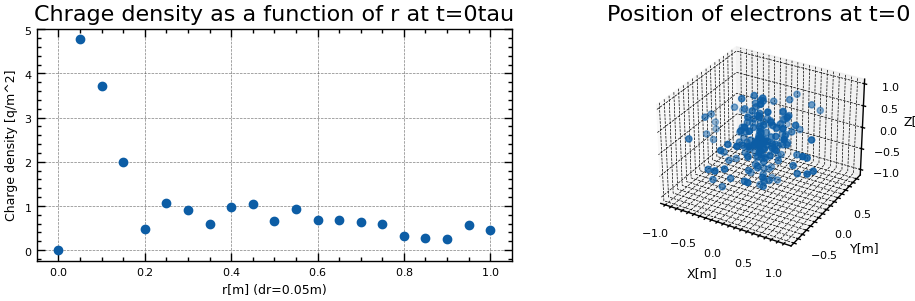

In [ ]:
# Constatnts
R = 1
n = 200
tau = 10**(-3)
v_0 = 0
number_steps = 300
dr = 0.05
kwargs3d={'xlabel':'X[m]', 'ylabel':'Y[m]', 'zlabel':'Z[m]'}

# function for calculating the charge density as a function of r
# output as array of dr elements and the number of electrons in each dr
def calc_charge_density_of_r(all_r_pos, dr):
  all_r_pos.sort()
  index = 0
  num_electrons = []
  for i in np.arange(0, R+dr, dr):
    num_electrons.append(0)
    for j in all_r_pos[index:]:
      if j<i:
        num_electrons[-1] += 1
        index += 1
      else:
        break;
    num_electrons[-1] /= 4*np.pi*(i+dr)*2
  return [num_electrons, np.arange(0, R+dr, dr)]


# create ball with random uniform distribution of 200 electrons in an array.
# position generated in spherical coordinates and initialized in cartesian
all_curr_pos, all_curr_XYZ = [], [[],[],[]]
all_electrons = []
all_r_pos = []
count_in = []
for i in range(n):
  r = np.random.uniform(0,R)
  theta = np.random.uniform(0, np.pi)
  phi = np.random.uniform(0, 2*np.pi)
  pos = np.array([r*np.sin(theta)*np.cos(phi),
                  r*np.sin(theta)*np.sin(phi),
                  r*np.cos(theta)])
  all_electrons.append(Electron(pos, v_0))
  all_curr_pos.append(pos)
  all_curr_XYZ[X].append(pos[X])
  all_curr_XYZ[Y].append(pos[Y])
  all_curr_XYZ[Z].append(pos[Z])
  all_r_pos.append(r)
all_curr_pos = np.asarray(all_curr_pos)

# Initial state:
fig = plt.figure(figsize=(10, 3), constrained_layout=True)
grid = fig.add_gridspec(ncols = 2, nrows = 1)
ax_3d_start = fig.add_subplot(grid[0,1], projection='3d',
                              title = 'Position of electrons at t=0', 
                              **kwargs3d)
ax_p_of_r_start = fig.add_subplot(grid[0, 0], 
                                  title='Chrage density as a function of r at t=0tau',
                                  xlabel='r[m] (dr=0.05m)', 
                                  ylabel='Charge density [q/m^2]')
# start plots
ax_3d_start.scatter(all_curr_XYZ[X], all_curr_XYZ[Y], all_curr_XYZ[Z])
density_of_r_start = calc_charge_density_of_r(all_r_pos, dr)
ax_p_of_r_start.scatter(density_of_r_start[1], density_of_r_start[0])

plt.show()

State after $300\tau$:

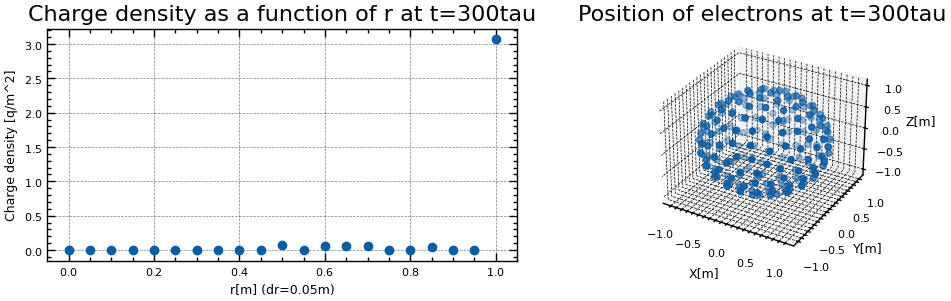

In [ ]:
# State after 300 tau:
fig = plt.figure(figsize=(10, 3), constrained_layout=True)
grid = fig.add_gridspec(ncols = 2, nrows = 1)

ax_3d_end = fig.add_subplot(grid[0,1], projection='3d',
                            title = f'Position of electrons at t={number_steps}tau', 
                            **kwargs3d)
ax_p_of_r_end = fig.add_subplot(grid[0, 0], 
                                title=f'Charge density as a function of r at t={number_steps}tau',
                                xlabel='r[m] (dr=0.05m)', 
                                ylabel='Charge density [q/m^2]')

# calculation of end position
for t in range(number_steps):
  count_in.append(0)
  for i in range(n):
    all_electrons[i].movement_in_sphere_3d(tau, all_curr_pos, R, i)
    if np.linalg.norm(all_electrons[i].pos) < (1-dr):
      count_in[-1] += 1
  for i in range(n):
    all_curr_pos[i] = all_electrons[i].pos

for i in range(len(all_electrons)):
  all_curr_XYZ[X][i] = all_electrons[i].pos[X]
  all_curr_XYZ[Y][i] = all_electrons[i].pos[Y]
  all_curr_XYZ[Z][i] = all_electrons[i].pos[Z]
  all_r_pos[i] = np.linalg.norm(all_electrons[i].pos)


# end plots
ax_3d_end.scatter(all_curr_XYZ[X], all_curr_XYZ[Y], all_curr_XYZ[Z])
density_of_r_end = calc_charge_density_of_r(all_r_pos, dr)
ax_p_of_r_end.scatter(density_of_r_end[1], density_of_r_end[0])

plt.show()

The number of electrons inside the sphere as a function of time:

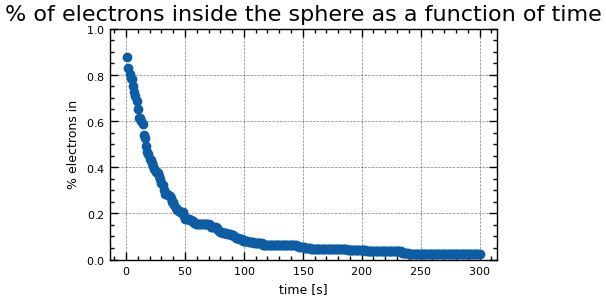

In [ ]:
# number of electrons inside ad a function of time
vector_e_in = np.asarray(count_in)

plt.figure(figsize=(5,3))
plt.scatter(np.linspace(1, number_steps, num = number_steps), vector_e_in/n)

plt.xlabel("time [s]")
plt.ylabel("% electrons in")
plt.ylim(0,1)
plt.title("% of electrons inside the sphere as a function of time")

plt.show()

### 6.
In a state of equilibrium (after a very long time), all of the charges are in the outer layer of the (hollow) sphere, where moving on the shell of the sphere does not require energy (as shown above in the simulation result). notice we still have some electrons in inner shells (see fig of charge sendity at end state), but we expect them to move outwards for longer times.

### 7.
In the problem we have symmetries over $({\hat{\theta},\hat{\phi}})$ axes, so we can work only with ${\hat{r}}$ axis. We know that:
$${\vec{E}=-\nabla{\Phi}}$$
$${\Rightarrow}{\space}{-\int_0^r{\vec{E}}} = {\Phi}$$
$${\Phi = } \frac{Q_{tot}}{4\pi\epsilon_0R} = \frac{200\cdot q_e}{4\pi\epsilon_0R} $$

The analytical derivation is based solely on the electric field over $\hat r$ and it describes exactly the result we got in the simulation (for a hollow sphere).

## Part 3
### 8.
 For a given conducting disc with radius $R = 1m$ with a potential $\phi$, based on the mathematical derivation from the article we get the expression for the charge density (for $\sigma _0 =Q(r)/4\pi R^2$):
$$ \sigma(r) = \frac{2\sigma _0 R}{\sqrt{R^2-r^2}} = \frac{Q(r)}{2\pi R\sqrt{R^2-r^2}}  $$

We strated with the same values used in the sphere, and used the same function 'movementer_in_sphere3D' but gave the positions z=0 so they won't move in that direction. <br>
At first, we got some weird results of electrons moving on each other and dividing by zero, an error that occured later in the cube. We used our solution for the cube (see part 4) of changing $\tau$ to $ 5\cdot 10^{-4} s $ and increased the number of steps, which resulted no overlaps between electrons with a very nice state of equilibrium, as shown below.


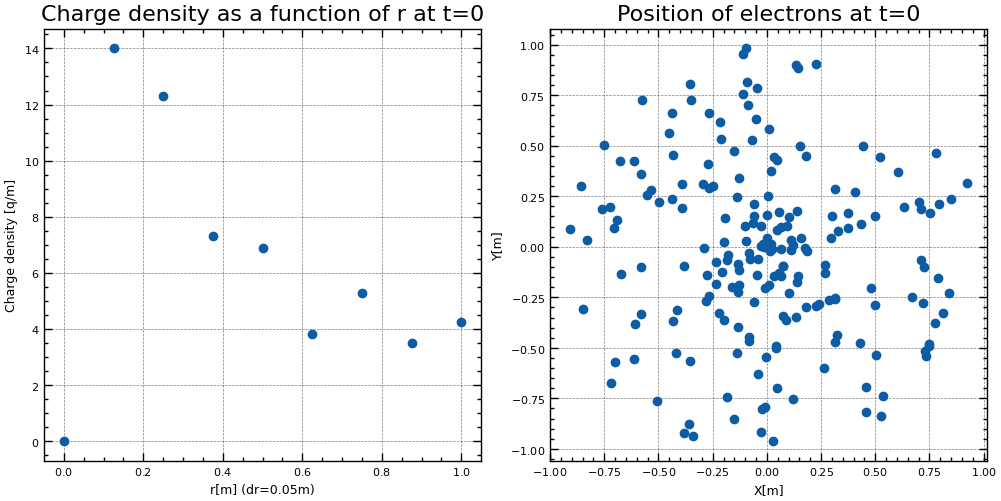

In [ ]:
R = 1
n = 200
tau = 5*10**(-4)
v_0 = 0
number_steps = 100
dr = 0.125
kwargs2d={'xlabel':'X[m]', 'ylabel':'Y[m]'}

def calc_charge_density_of_r(all_r_pos, dr):
  all_r_pos.sort()
  index = 0
  num_electrons = []
  for i in np.arange(0, R+dr, dr):
    num_electrons.append(0)
    for j in all_r_pos[index:]:
      if j<i:
        num_electrons[-1] += 1
        index += 1
      else:
        break;
    num_electrons[-1] /= 2*np.pi*(i+dr)
  return [num_electrons, np.arange(0, R+dr, dr)]

all_curr_pos, all_curr_XY = [], [[],[]]
all_electrons = []
all_r_pos = []
count_in_disc = []
for i in range(n):
  r = np.random.uniform(0,R)
  phi = np.random.uniform(0, 2*np.pi)
  pos = np.array([r*np.cos(phi),
                  r*np.sin(phi),
                  0])
  all_electrons.append(Electron(pos, v_0))
  all_curr_pos.append(pos)
  all_curr_XY[X].append(pos[X])
  all_curr_XY[Y].append(pos[Y])
  all_r_pos.append(r)
all_curr_pos = np.asarray(all_curr_pos)

# Initial state:
fig = plt.figure(figsize=(10, 5), constrained_layout=True)
grid = fig.add_gridspec(ncols = 2, nrows = 1)
ax_pos_start = fig.add_subplot(grid[0,1], 
                               title = 'Position of electrons at t=0', 
                               **kwargs2d)
ax_p_of_r_start = fig.add_subplot(grid[0, 0], 
                                  title='Charge density as a function of r at t=0',
                                  xlabel='r[m] (dr=0.05m)', '
                                  ylabel='Charge density [q/m]')
# start plots
ax_pos_start.scatter(all_curr_XY[X], all_curr_XY[Y])
density_of_r_start = calc_charge_density_of_r(all_r_pos, dr)
ax_p_of_r_start.scatter(density_of_r_start[1], density_of_r_start[0])

plt.show()

State after $100\tau$

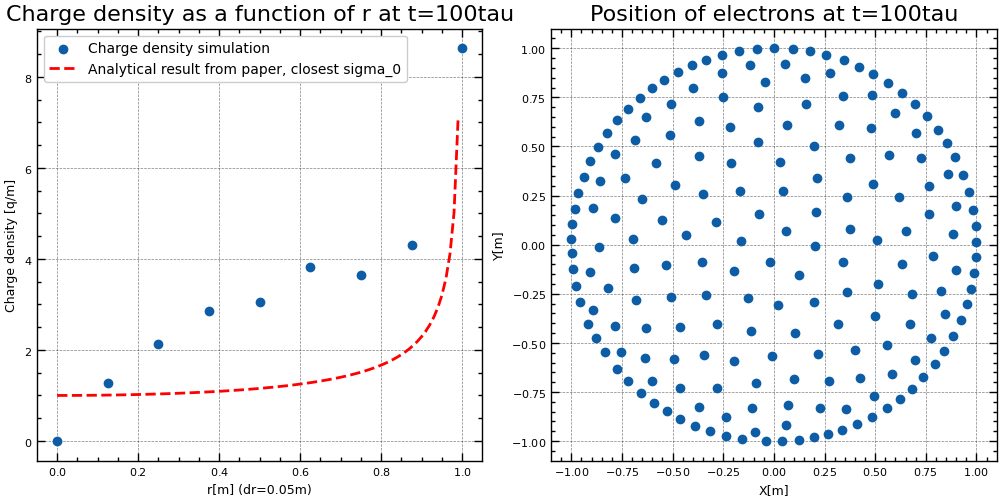

In [ ]:
# State after 100 tau:
fig = plt.figure(figsize=(10, 5), constrained_layout=True)
grid = fig.add_gridspec(ncols = 2, nrows = 1)

ax_pos_end = fig.add_subplot(grid[0,1], 
                             title = f'Position of electrons at t={number_steps}tau', 
                             **kwargs2d)
ax_p_of_r_end = fig.add_subplot(grid[0, 0], 
                                title=f'Charge density as a function of r at t={number_steps}tau',
                                xlabel='r[m] (dr=0.05m)', 
                                ylabel='Charge density [q/m]')

# calculation of end position
for t in range(number_steps):
    count_in_disc.append(0)
    for i in range(n):
        all_electrons[i].movement_in_sphere_3d(tau, all_curr_pos, R, i)
        if np.linalg.norm(all_electrons[i].pos) < (1-dr):
          count_in_disc[-1] += 1
    for i in range(n):
        all_curr_pos[i] = all_electrons[i].pos

for i in range(len(all_electrons)):
  all_curr_XY[X][i] = all_electrons[i].pos[X]
  all_curr_XY[Y][i] = all_electrons[i].pos[Y]
  all_r_pos[i] = np.linalg.norm(all_electrons[i].pos)

# analytical result
sigma_0 = 0.5
continous_r = np.linspace(0,1, num=100, endpoint=False)
q_density_analytical = [((2*sigma_0)/(np.sqrt((R**2) - 
                                        (r**2)))) for r in continous_r]

# end plots
ax_pos_end.scatter(all_curr_XY[X], all_curr_XY[Y])
density_of_r_end = calc_charge_density_of_r(all_r_pos, dr)
ax_p_of_r_end.scatter(density_of_r_end[1], density_of_r_end[0],
                      label='Charge density simulation')
ax_p_of_r_end.plot(continous_r, q_density_analytical, 'r--', 
                   label='Analytical result from paper, closest sigma_0')
ax_p_of_r_end.legend(loc='upper left', fontsize=10)

plt.show()

The analytical derivation from the article was very arbitrary for us as we couldn't figure out what value should be $\sigma _0$ or Q from the paper, and every value we calculated with the total charge in the system was not good with the fit. <br>
Finally, after some experimentation with the code , we found some arbitrary value that seems ok in the order of the magnitude just for the sake of comparison. Our result for charge density was calculated on dr=0.125m and as can be seen in the figure above, it does not behave like we expected.<br>
We couldn't find a possible explanation for it but the assumption of mistreating properly the analytical derivation by us cannot be dismissed. <br>
Secondly, looking on the positions of the electrons we get a nice symmetric distribution on the edges and insige the disc. Usually, we expect no charges inside a conductor, but beacause the disc does not have volume, it is just surface of a conductor. <br>

The charges are expected to be everywhere on it in a state of equilibrium. We see that as the distance from its center gets larger, the charge density ($\sigma$) gets larger expectedly, as noted.

<br> We still see a major accumulation in the edge of the disc, and that's expected as well.

Plot of number of electrons inside the disc as a function of time:

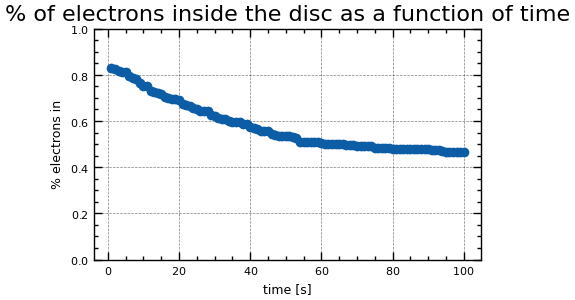

In [ ]:
# number of electrons inside ad a function of time
vector_e_in_disc = np.asarray(count_in_disc)

plt.figure(figsize=(5,3))
plt.scatter(np.linspace(1, number_steps, num = number_steps), vector_e_in_disc/n)

plt.xlabel("time [s]")
plt.ylabel("% electrons in")
plt.ylim(0,1)
plt.title("% of electrons inside the disc as a function of time")

plt.show()

### 8.
Inside the disc, the fact that the electric field is 0 does not contradict the existence of electrons in it. This is because the electric field is the gradient of the potential and so the potential is constant.




#Part 4
#####The given square doesn't have any symmetries over it, so we cannot assume the previous assumptions. We need to calculate the field with the Cartesian coordinates individually.

#####This is why we expect the charges to build up in the edges of the square (like billiard balls stuck in the edges of the table) and the remaining charges to be spread uniformally and randomly.
#####Our algorithm works for this problem as we will show and explain further in this simulation:


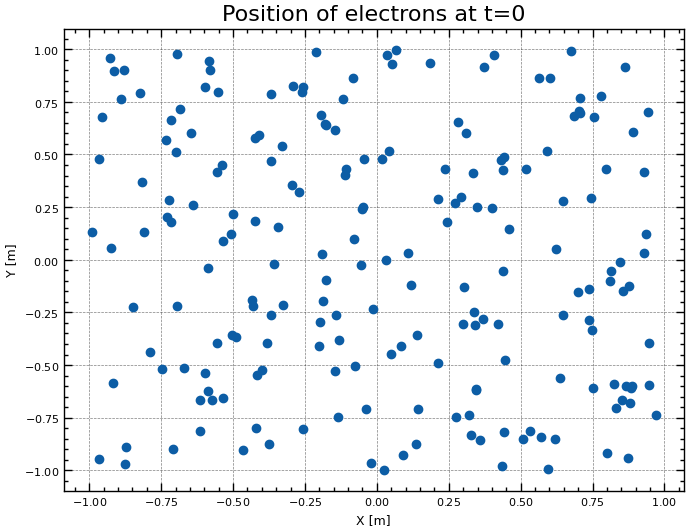

In [ ]:
R = 1
n = 200
tau = 5*10**(-4)
v_0 = 0
number_steps = 1000
dl = 0.05

all_curr_pos, all_curr_XY = [], [[],[]]
all_electrons = []
all_dists = []
count_in_cube = []

for i in range(n):
    x = np.random.uniform(-R, R)
    y = np.random.uniform(-R, R)
    pos = np.array([x, y, 0])
    all_electrons.append(Electron(pos, v_0))
    all_curr_pos.append(pos)
    all_curr_XY[X].append(pos[X])
    all_curr_XY[Y].append(pos[Y])
all_curr_pos = np.asarray(all_curr_pos)

# Initial state:
plt.scatter(all_curr_XY[X], all_curr_XY[Y])
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.title("Position of electrons at t=0")

plt.show()

<Figure size 800x600 with 0 Axes>

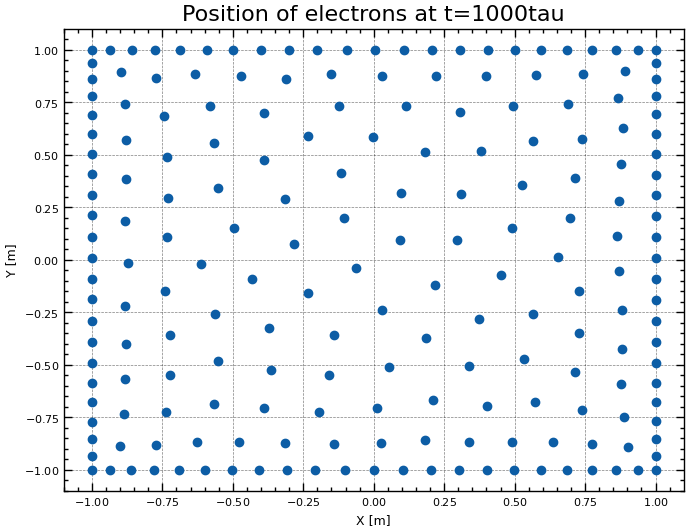

<Figure size 800x600 with 0 Axes>

In [ ]:
# calculation of end position
for t in range(number_steps):
  count_in_cube.append(0)
  for i in range(n):
    all_electrons[i].movement_in_cube_3d(tau, all_curr_pos, R, i)
    if (all_electrons[i].pos[X] < 1) and (all_electrons[i].pos[Y] < 1):
      count_in_cube[-1] += 1
  for i in range(n):
    all_curr_pos[i] = all_electrons[i].pos

for i in range(len(all_electrons)):
  all_curr_XY[X][i] = all_electrons[i].pos[X]
  all_curr_XY[Y][i] = all_electrons[i].pos[Y]

plt.scatter(all_curr_XY[X], all_curr_XY[Y])
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.title(f"Position of electrons at t={number_steps}tau")

plt.figure()


While trying to run the simulation we encountered a "divide by zero" error every time. We discovered that the reason for this was the buildup of electrons at the corners of the square, resulting in multiple electrons at the same position. <br>
We tried to add some form of "collisions" in the simulation, resulting in random distribution with chunks of electrons together, which is also unlikeley. <br>
We found a simple solution, we changed tau to $\tau = 10^{-4}$. the motivation was to make more distance between the electrons, lowering the probability of two at the same place by restricting their "free" movement bewtween steps.